In [35]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [17]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1634k      0 --:--:-- --:--:-- --:--:-- 1634k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [18]:
query = '''
           WITH family_size as (SELECT c.id, COUNT(r.category) as nb_rel FROM customers as c 
                 JOIN relatives r  ON c.id = r.customer_id
                 GROUP BY c.id
                 ),
                work_experience as (SELECT c.id, SUM(e.duration) as nb_y FROM customers as c 
                 JOIN experiences e  ON c.id = e.customer_id
                 GROUP BY c.id
                 )            
           SELECT c.id, c.gender, c.married, c.age, c.graduated, c.score, 
                  p.category, f.nb_rel, w.nb_y, c.segment 
           FROM customers as c
           LEFT JOIN family_size as f ON c.id = f.id
           LEFT JOIN work_experience as w ON c.id = w.id
           LEFT JOIN experiences as e ON  c.id = e.customer_id           
           LEFT JOIN professions as p ON e.profession_id = p.id
        '''


**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [19]:
conn = sqlite3.connect('db/customers.sqlite')
c = conn.cursor()

In [20]:
my_db = c.execute(query)
results = my_db.fetchall()

In [21]:
len(results)

8068

In [22]:
pd.DataFrame(results,columns=['id', 'gender','married','age','graduated','score',\
                              'profession','family_size','work_experience', 'segment']).head(10)

,id,gender,married,age,graduated,score,profession,family_size,work_experience,segment
0,1,Male,No,22,No,Low,Healthcare,3.0,1.0,D
1,2,Female,Yes,38,Yes,Average,Engineer,2.0,NaN,A
2,3,Female,Yes,67,Yes,Low,Engineer,NaN,1.0,B
3,4,Male,Yes,67,Yes,High,Lawyer,1.0,0.0,B
4,5,Female,Yes,40,Yes,High,Entertainment,5.0,NaN,A
5,6,Male,Yes,56,No,Average,Artist,1.0,0.0,C
6,7,Male,No,32,Yes,Low,Healthcare,2.0,1.0,C
7,8,Female,No,33,Yes,Low,Healthcare,2.0,1.0,D
8,9,Female,Yes,61,Yes,Low,Engineer,2.0,0.0,D
9,10,Female,Yes,55,Yes,Average,Artist,3.0,1.0,C


#### 💾 Save your results

Run the following cell to save your results.

In [23]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [81]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv >> data/customers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  368k  100  368k    0     0  1311k      0 --:--:-- --:--:-- --:--:-- 1311k


In [149]:
customers = pd.read_csv('data/customers.csv')

In [28]:
customers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


**💾 Save your results**

Run the following cell to save your results.

In [29]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [ ]:
# Start your data analysis!

In [150]:
customers['Ever_Married'].fillna('No',inplace=True)
customers['Graduated'].fillna('No',inplace=True)
customers['Work_Experience'].fillna(0.,inplace=True)
customers['Family_Size'].fillna(1.,inplace=True)
customers['Profession'].fillna('None',inplace=True)

a_segment = customers[customers['Segmentation']=='A']
b_segment = customers[customers['Segmentation']=='B']
c_segment = customers[customers['Segmentation']=='C']
d_segment = customers[customers['Segmentation']=='D']

In [205]:
len(a_segment)

1972

In [206]:
len(b_segment)

1858

In [208]:
len(c_segment)

1970

In [209]:
len(d_segment)

2268

In [151]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


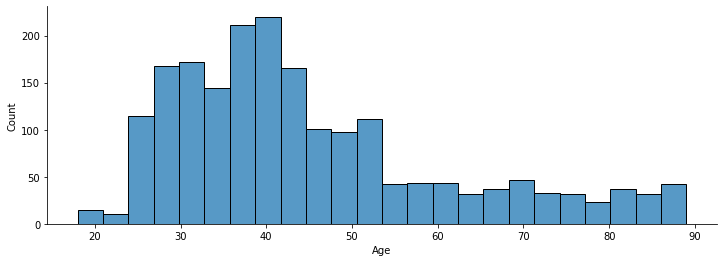

In [191]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,4))
sns.histplot(a_segment, x='Age',ax=ax)
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
fig.savefig('a_segment.jpg')

In [192]:
a_segment['Age'].median()

41.0

In [201]:
a_prof = pd.DataFrame(a_segment['Profession'].value_counts()).head(5)
a_prof.style.set_table_attributes('style="font-size: 20px"')

,Profession
Artist,558
Entertainment,365
Engineer,259
Doctor,199
Lawyer,197


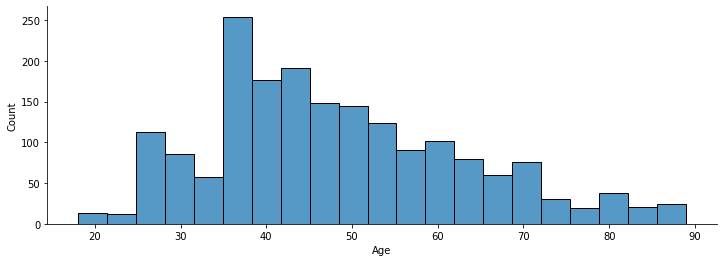

In [193]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,4))
sns.histplot(b_segment, x='Age',ax=ax)
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
fig.savefig('b_segment.jpg')

In [194]:
b_segment['Age'].median()

46.0

In [202]:
b_prof = pd.DataFrame(b_segment['Profession'].value_counts()).head(5)
b_prof.style.set_table_attributes('style="font-size: 20px"')

,Profession
Artist,756
Entertainment,221
Engineer,189
Executive,183
Lawyer,158


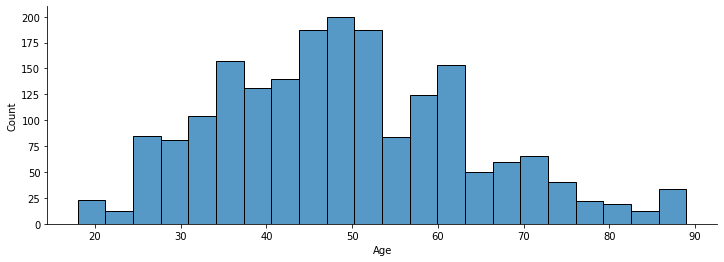

In [195]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,4))
sns.histplot(c_segment, x='Age',ax=ax)
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
fig.savefig('c_segment.jpg')

In [196]:
c_segment['Age'].median()

49.0

In [203]:
c_prof = pd.DataFrame(c_segment['Profession'].value_counts()).head(5)
c_prof.style.set_table_attributes('style="font-size: 20px"')

,Profession
Artist,1065
Executive,175
Entertainment,148
Healthcare,146
Lawyer,140


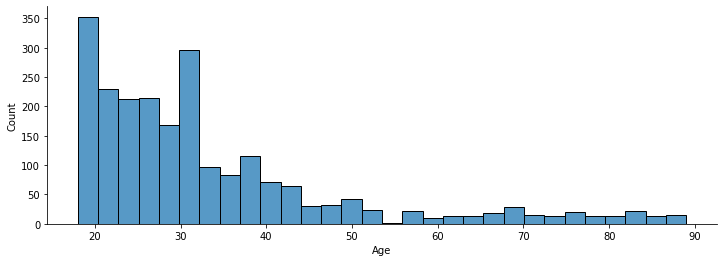

In [197]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,4))
sns.histplot(d_segment, x='Age',ax=ax)
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
fig.savefig('d_segment.jpg')

In [198]:
d_segment['Age'].median()

29.0

In [204]:
d_prof = pd.DataFrame(d_segment['Profession'].value_counts()).head(5)
d_prof.style.set_table_attributes('style="font-size: 20px"')

,Profession
Healthcare,979
Entertainment,215
Doctor,206
Engineer,176
Marketing,170


### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [24]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [210]:
customers = pd.read_csv('data/customers.csv')
X = customers.drop(columns=['Segmentation'])
y = customers['Segmentation']

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


In [212]:
X['Ever_Married'].fillna('No',inplace=True)
X['Graduated'].fillna('No',inplace=True)
X['Work_Experience'].fillna(0.,inplace=True)
X['Family_Size'].fillna(1.,inplace=True)
X['Profession'].fillna('None',inplace=True)

In [213]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 567.4+ KB


### Approach 1 -> elbow method

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

num_features = [ 'Age','Work_Experience','Family_Size' ]
cat_features = ['Gender', 'Graduated', 'Profession', 'Ever_Married', 'Spending_Score' ]

# Impute then Scale for numerical variables: 
num_transformer = MinMaxScaler()

# Encode categorical variables
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, num_features),
    ('cat_transformer', cat_transformer, cat_features)])

In [30]:
preprocessor.fit(X)
X_transformed = preprocessor.transform(X)

In [31]:
l_n_clusters = range(1,11)
variance_explained = []
for n_clusters in l_n_clusters:
    km = KMeans(n_clusters=n_clusters)
    km.fit(X_transformed)
    variance_explained.append(km.inertia_)

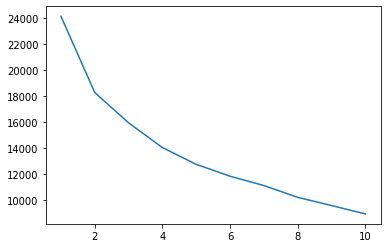

In [32]:
plt.plot(l_n_clusters, variance_explained);

### Approach 2 -> dendrogram

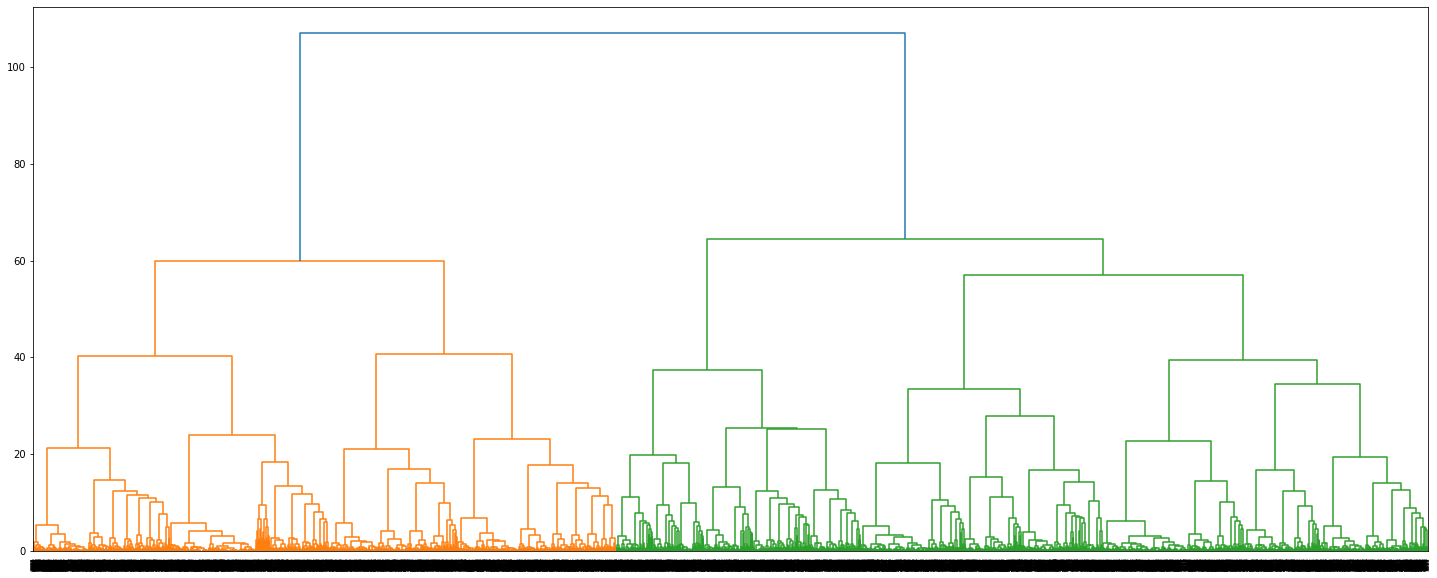

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_transformed, method='ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### Approach 3 -> empirical method base on profession

In [146]:
customers['Profession'].fillna('None',inplace=True)
pd.DataFrame(customers['Profession'].value_counts())

,Profession
Artist,2516
Healthcare,1332
Entertainment,949
Engineer,699
Doctor,688
Lawyer,623
Executive,599
Marketing,292
Homemaker,246
None,124


In [176]:
cluster_1 = (customers['Profession'] == 'Artist') | (customers['Profession'] == 'Entertainment')
cluster_2 = (customers['Profession'] == 'Healthcare') | (customers['Profession'] == 'Doctor')
cluster_3 = (np.ones(len(customers)) - cluster_1 - cluster_2)== 1
customers['empirical_cluster'] = cluster_1 * 1 + cluster_2 * 2 + cluster_3 * 3

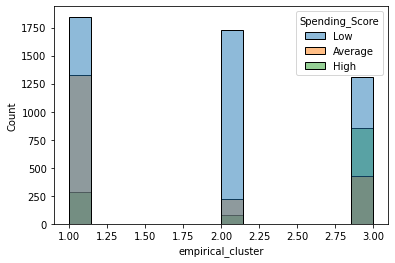

In [177]:
sns.histplot(customers, x='empirical_cluster',hue='Spending_Score');

**💾 Save your results**

Run the following cell to save your results.

-> trusting dendrogram

In [217]:
n_clusters = 2

In [218]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [100]:
# Load the data and display the first rows
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv >> data/customers_encoded.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  384k  100  384k    0     0  1104k      0 --:--:-- --:--:-- --:--:-- 1104k


In [102]:
customers_encoded = pd.read_csv('data/customers_encoded.csv')

In [107]:
customers_encoded.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,is_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

> H_0 hypothesis : age from segment D is the same as others segments

In [132]:
age_customers = customers_encoded['Age']
age_customers_mean  = age_customers_abc.mean()
age_customers_sigma = age_customers_abc.std()

In [133]:
age_customers_abc_mean 

47.40724137931034

In [134]:
age_customers_abc_sigma

15.399615109428858

In [214]:
## Significance level α 

alpha = 0.05
age_customers_abc_mean * (1-alpha)

45.03687931034482

In [135]:
sample = customers_encoded.sample(100).copy()
age_customers_d = sample[sample['is_D']==1]['Age'].mean()

age_customers_d

37.470588235294116

In [215]:
# Test
from scipy.stats import norm

X = norm(age_customers_mean, age_customers_sigma/(100**0.5))
p_value = (1 - X.cdf(45)); p_value

0.9409952002264691

In [ ]:
# p_value

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [226]:
odds=len(d_segment)/len(customers)

In [227]:
customers_encoded['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [228]:
# odds
import statsmodels.formula.api as smf

married_and_graduated = customers_encoded[(customers_encoded['Ever_Married']=='Yes') & \
                                          (customers_encoded['Graduated']=='Yes')
                                         ]

logit_d = smf.logit(formula='is_D ~ C(Gender) + C(Ever_Married) + Age + C(Graduated)', data=married_and_graduated).fit()
logit_d.summary()

Optimization terminated successfully.
         Current function value: 0.282896
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_D   No. Observations:                 3240
Model:                          Logit   Df Residuals:                     3237
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:                 0.02129
Time:                        17:54:32   Log-Likelihood:                -916.58
converged:                       True   LL-Null:                       -936.52
Covariance Type:            nonrobust   LLR p-value:                 2.183e-09
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5882      0.258     -6.146      0.000      -2.095      -1.082
C(Gender)[T.Male]     0.5253      0.137      3.830      0.000       0.256       0.794
Age                  -0.0228      0.005     -4.714      0.000      -0.032      -0.013
=====================================================================================
"""

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [222]:
# odds_variation
odds_variation = -0.0228

####  💾 Save your results

Run the following cell to save your results.

In [229]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**

In [ ]:
### sandbox

In [ ]:
cluster_1 = (customers['Profession'] == 'Artist') | (customers['Profession'] == 'Entertainment')
cluster_2 = (customers['Profession'] == 'Healthcare') | (customers['Profession'] == 'Doctor')
cluster_3 = (np.ones(len(customers)) - cluster_1 - cluster_2)== 1
customers['empirical_cluster'] = cluster_1 * 1 + cluster_2 * 2 + cluster_3 * 3